# Analysis Of Video Game Data by Unit Sales

In this notebook I took video game data from kaggle (https://www.kaggle.com/gregorut/videogamesales). I downloaded it as a csv file, imported it into a T-SQL database and used Python's pyodbc library to make SQL Queries here to the database and into a pandas dataframe for analysis and visualization. I did this specifically to demonstrate my ability to use SQL. 

In [1]:
import pyodbc
import numpy
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

# Connecting to my MS SQL Server
conn = pyodbc.connect('Driver={SQL Server};'
                      'Server=Server_Name;'
                      'Database=VideoGames;'
                      'Trusted_Connection=yes;')

### Overall Sales

I wanted to know which games have had the most sales overall. Lets check out the top 10!

In [2]:
df = pd.read_sql_query("""SELECT game_name, global_sales 
                       FROM[VideoGames.Sales] 
                       ORDER BY Global_Sales DESC;""",conn)

df.head()

,game_name,global_sales
0,Wii Sports,82.74
1,Super Mario Bros.,40.24
2,Mario Kart Wii,35.82
3,Wii Sports Resort,33.00
4,Pokemon Red/Pokemon Blue,31.37


In [3]:
top_10 = df.nlargest(10,'global_sales')

In [4]:
top_10

,game_name,global_sales
0,Wii Sports,82.74
1,Super Mario Bros.,40.24
2,Mario Kart Wii,35.82
3,Wii Sports Resort,33.00
4,Pokemon Red/Pokemon Blue,31.37
5,Tetris,30.26
6,New Super Mario Bros.,30.01
7,Wii Play,29.02
8,New Super Mario Bros. Wii,28.62
9,Duck Hunt,28.31


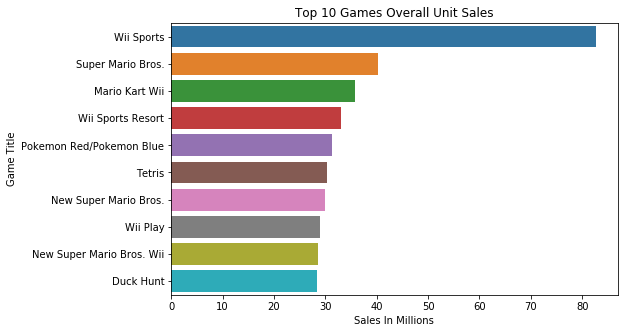

In [5]:
plt.figure(figsize=(8,5))

sns.barplot(x='global_sales', y='game_name',data=top_10)

plt.title('Top 10 Games Overall Unit Sales')
plt.ylabel('Game Title')
plt.xlabel('Sales In Millions')

plt.show()

Here we see Wii Sports comming in first, followed by Super Mario Bros, and Mario Kart Wii.

### Unit Sales Over Time

How have overall unit sales across all platforms, for all games done over time? To answer this we are going to Make a line graph showing total unit sales over the last 40 years!

In [6]:
df = pd.read_sql_query("""SELECT release_year, SUM(global_sales) AS total_sales 
                       FROM [VideoGames.Sales] 
                       GROUP BY release_year 
                       ORDER BY release_year asc;""",conn)

df.head()

,release_year,total_sales
0,1980,11.38
1,1981,35.77
2,1982,28.86
3,1983,16.79
4,1984,50.36


Text(0, 0.5, 'Total Unit Sales in Millions')

<Figure size 360x360 with 0 Axes>

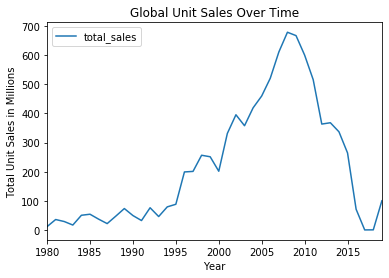

In [7]:
plt.figure(figsize=(5,5))

df.plot.line(x='release_year')

plt.title('Global Unit Sales Over Time')

plt.xlabel('Year')
plt.ylabel('Total Unit Sales in Millions')

We see a Big plateu in sales between 2005 2012. This is when the most games were sold during this 40 year period.

### Exploring Deeper

Following the period of high Unit sales, we are going to explore deeper between 2005 and 2012 and see if we can find some useful insights.

In [11]:
df = pd.read_sql_query("""SELECT game_name, release_year, global_sales
                       FROM[VideoGames.Sales] 
                       WHERE release_year IN ('2005','2006','2007','2008','2009','2010','2010','2011','2012')
                       ORDER BY Global_Sales DESC;""",conn)


In [9]:
# Get the top 10 of global sales.
top_10 = df.nlargest(10,'global_sales')

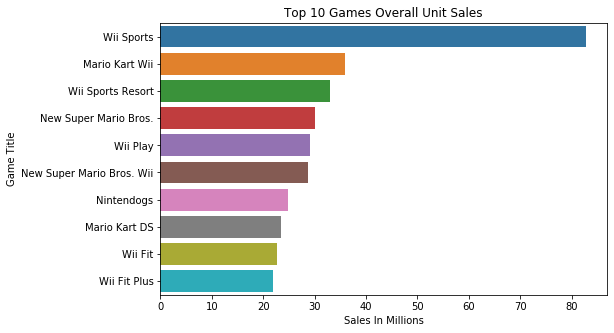

In [10]:
plt.figure(figsize=(8,5))

sns.barplot(x='global_sales', y='game_name',data=top_10)

plt.title('Top 10 Games Overall Unit Sales')
plt.ylabel('Game Title')
plt.xlabel('Sales In Millions')

plt.show()

We can see that most of the highest sold games during these years are also the highest sold games of all time.

## Conclusions

 According to this data set, Wii sports has had the highest amount of sales overall in the world with the second place game only having about half as many sales as wii sports.
 
 The highest video games sales happened between 2005 and 2012 and this also when many of the games with the highest amount of sales were released.
 
 There are many more factors to look into and insights to reap from this. I chose to stick with global sales with this anlaysis but, for example, one could compare Unit Sales between North America, European Union, and Japan. There is also the possibilty to gain some valuable insights from comparing the different gaming publishers. Most of the top games are from Nintendo and we have yet to see many top games from other publishers.
 
Thank you for reading, hope you enjoyed it!